In [1]:
# #Pandas and Seaborn based homework

# We will be working with the heart.csv data set

# https://www.kaggle.com/fedesoriano/heart-failure-prediction?select=heart.csv

# using tools in pandas and seaborn,  and ideas from the two Jupyter notebooks we've seen this week



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
infile="/content/drive/MyDrive/Colab Notebooks/Spring 2024/Stats for Big Data/Data/heart.csv"

bp_df=pd.read_csv(infile)
bp_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Find or create the following

-Find the dimensions,   memory used, and other basic information

-Run the data summary

-Create a pivot table showing Resting BP by Sex, Resting ECG and HeartDisease-What does this tell you?
        What else can you figure out using a Pivot table, show me two other helpful pivot tables

-Show a histogram and the ECDF for several continuous variables in the data set,   in broad terms, what do the distributions
   look like,  normal? exponential, poison-like?, uniform?   Does this match your expectations?

-Show An SNS Pairplot,   the most informative version you can find,   set the hue based on Heart Disease,  try using at least one
other variable as the Hue.  Discuss what you think you are seeing in this plot


Create all these results in this Notebook and turn it in

In [5]:
# -Find the dimensions, memory used, and other basic information
# Display information about the DataFrame
bp_df.info()

dimensions = bp_df.shape
print("DataFrame Shape:", dimensions)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
DataFrame Shape: (918, 12)


In [6]:
# Run the data summary
bp_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [7]:
# -Create a pivot table showing Resting BP by Sex, Resting ECG and HeartDisease-What does this tell you?
#         What else can you figure out using a Pivot table, show me two other helpful pivot tables
pd.pivot_table(bp_df, values='RestingBP', index=['Sex', 'RestingECG'], columns='HeartDisease', aggfunc='mean')

# This indicates that, on average, females without heart disease typically have lower RestingBP for  LVH, normal, and ST compared to
# males. However, females with heart disease typically exhibit higher RestingBP for LVH, normal, and ST than males.

HeartDisease             0           1
Sex RestingECG                        
F   LVH         128.696970  148.928571
    Normal      129.123596  139.310345
    ST          127.523810  139.285714
M   LVH         131.836735  135.467391
    Normal      129.921348  130.675781
    ST          134.275000  137.727273

In [8]:
pd.pivot_table(bp_df, values='Age', index=['Sex', 'ChestPainType'], columns='ExerciseAngina', aggfunc='mean')

#This indicates that there isn't a significant difference in age among various groups of females with different types
# of chest pain and those who experience angina. Except when comparing female in with chest paint type ATA with not
# ExerciseAngina adn the group who Exercised Angina

ExerciseAngina             N          Y
Sex ChestPainType                      
F   ASY            53.513514  55.090909
    ATA            48.636364  60.000000
    NAP            53.625000  48.400000
    TA             54.200000        NaN
M   ASY            53.401235  56.102273
    ATA            48.366337  54.916667
    NAP            51.884615  56.739130
    TA             55.033333  54.833333

In [9]:
pd.pivot_table(bp_df, values='MaxHR', index=['Sex', 'ExerciseAngina'], columns='HeartDisease', aggfunc='mean')

#  this to us, that, on average people who did not experience her disease have a higher maximum heart rate,
# then those who have experienced heart disease


HeartDisease                 0           1
Sex ExerciseAngina                        
F   N               149.866142  142.608696
    Y               142.562500  133.740741
M   N               149.640351  134.023669
    Y               136.153846  122.173010

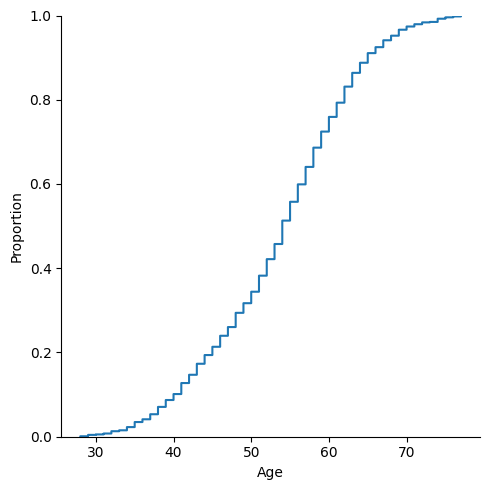

In [10]:
# -Show a histogram and the ECDF for several continuous variables in the data set,   in broad terms, what do the
# distributions look like, normal? exponential, poison-like?, uniform?   Does this match your expectations?

sns.displot(bp_df, x='Age', kind="ecdf")
# This appears to be a normal distribution, which would meet out expections because you would want your study group to be a normal distribution around age

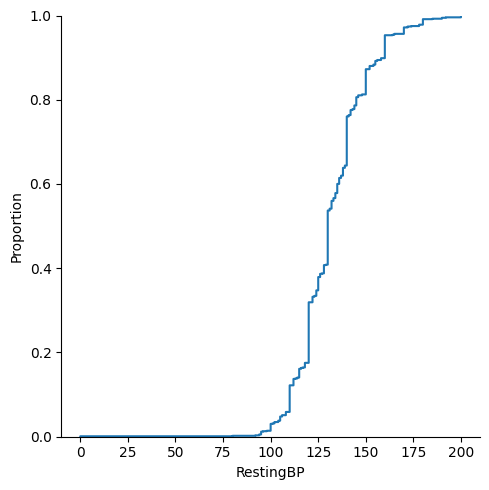

In [11]:
sns.displot(bp_df, x='RestingBP', kind="ecdf")
# This appears to be a normal distribution, which would meet out expections because you would want your study group to be a normal distribution around RestingBP
# However, this appear that there is an error with the data set because look to be reporting someone with a RestingBP of 0. Which means they are dead.

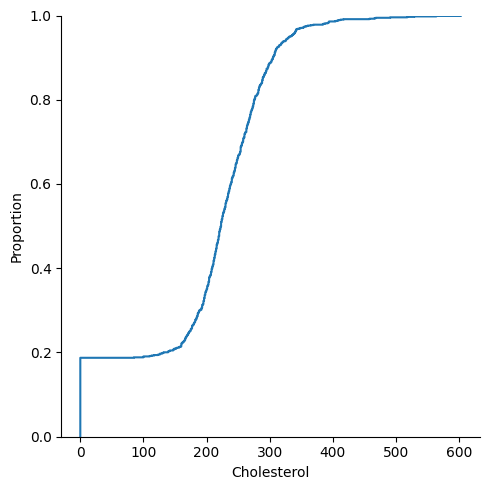

In [12]:
sns.displot(bp_df, x='Cholesterol', kind="ecdf")
# This appears to be a normal distribution, which would meet out expections because you would want your study group to be a normal distribution around Cholesterol
# However, this appear that there is an error with the data set because look to be reporting some with a Cholesterol of 0. Which does seem likely.

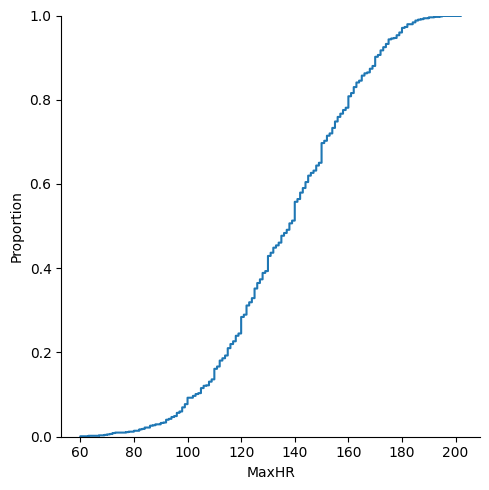

In [14]:
sns.displot(bp_df, x='MaxHR', kind="ecdf")
# This appears to be a normal distribution, which would meet out expections because you would want your study group to be a normal distribution around MaxHR


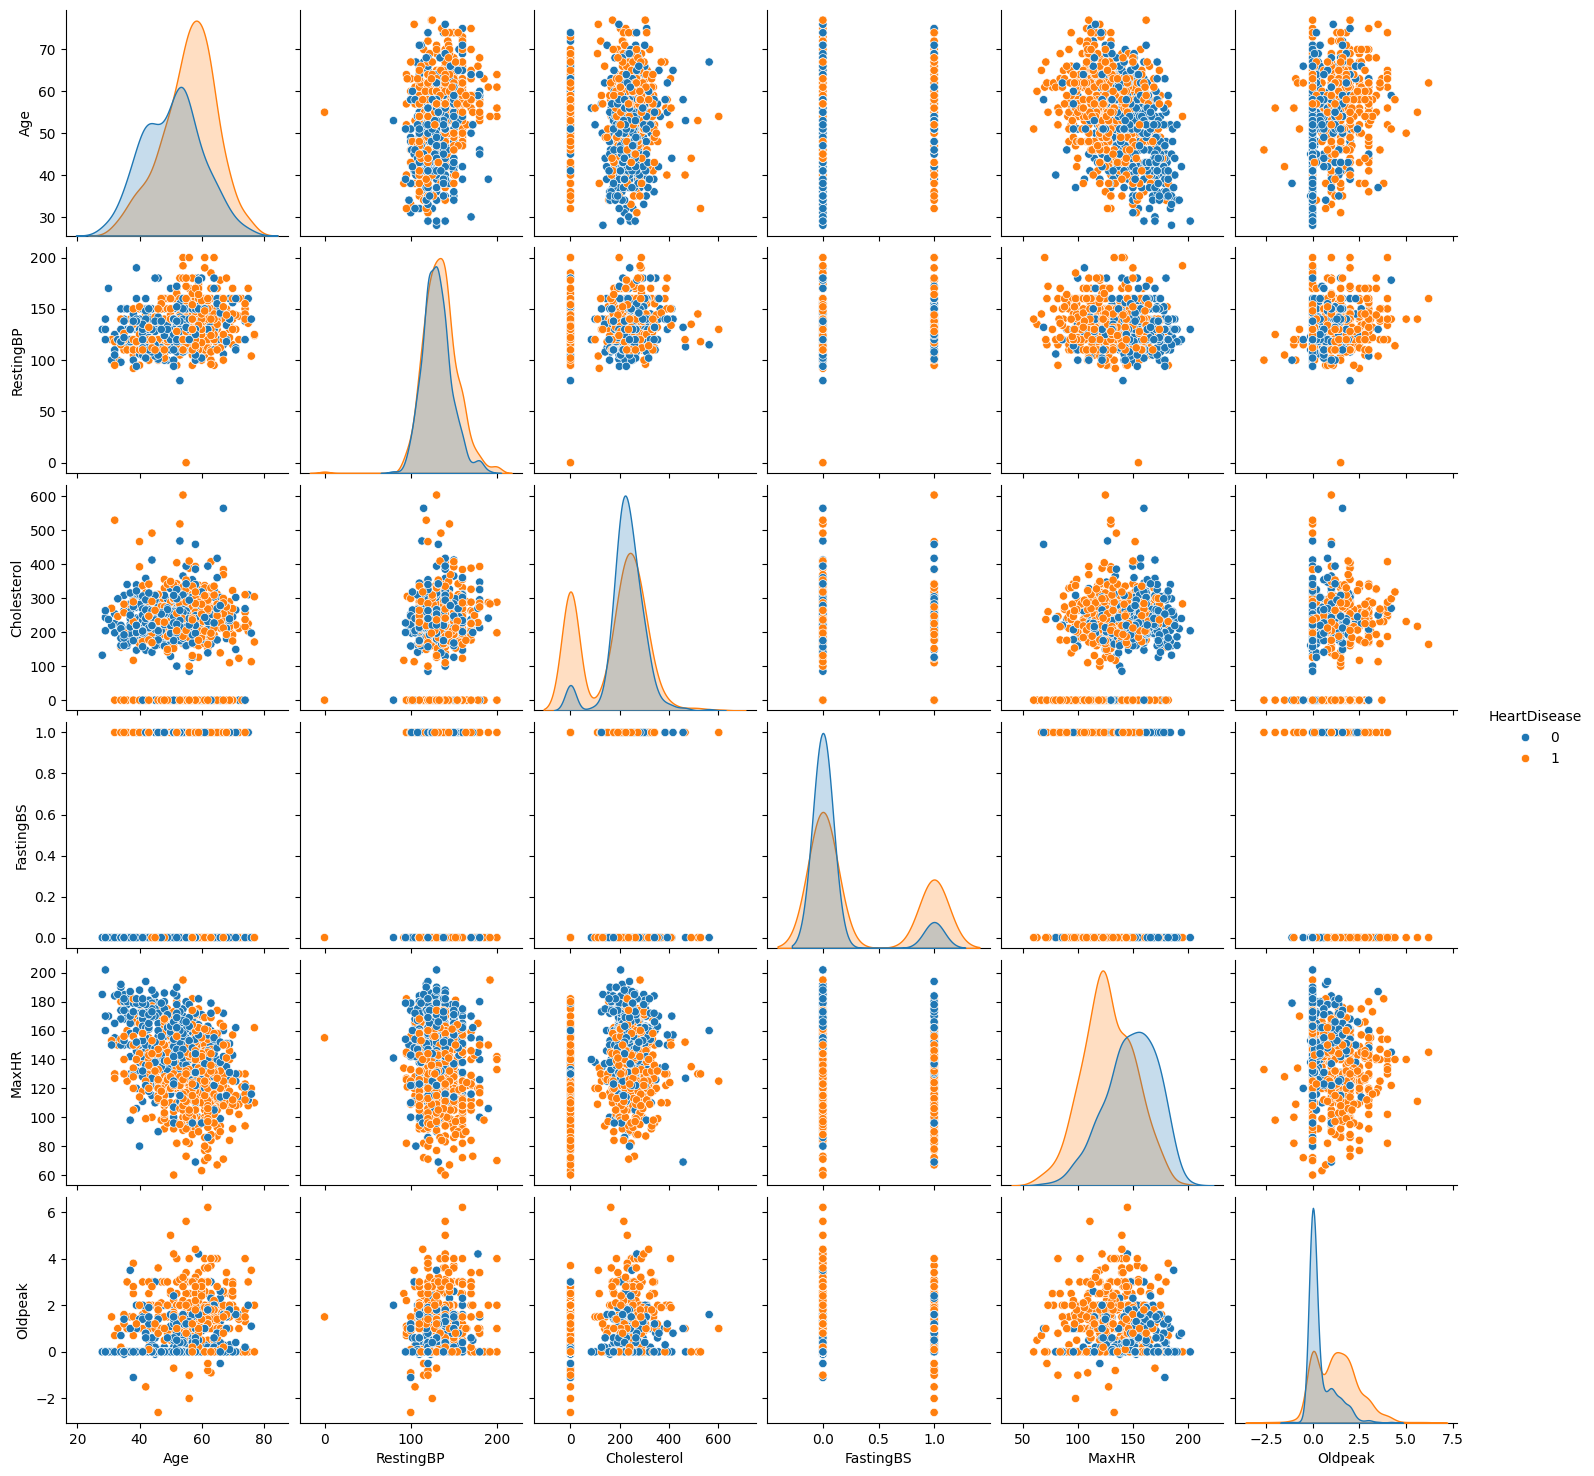

In [21]:
# -Show An SNS Pairplot,   the most informative version you can find,   set the hue based on Heart Disease,  try using at least one
# other variable as the Hue.  Discuss what you think you are seeing in this plot

sns.pairplot(bp_df, hue='HeartDisease')

This indicates that in the dataset, individuals who experienced heart disease are typically older than those who did not. It suggests that heart disease is more likely to affect the older population, particularly those aged 60 or above.

There seems to be a binomial distribution for cholesterol levels in both groups, those who experienced heart disease and those who did not. However, among those with heart disease, there is a larger proportion of individuals with low cholesterol levels compared to those without heart disease. This difference might be attributed to individuals with heart disease being on medication to manage their cholesterol levels, thereby preventing further heart complications.

Additionally, there appears to be a slight difference in maximum heart rate between these two groups. Individuals with heart disease tend to have a lower maximum heart rate compared to those without heart disease. This could be due to heart disease affecting the body's ability to achieve a high heart rate, possibly due to complications associated with the disease.

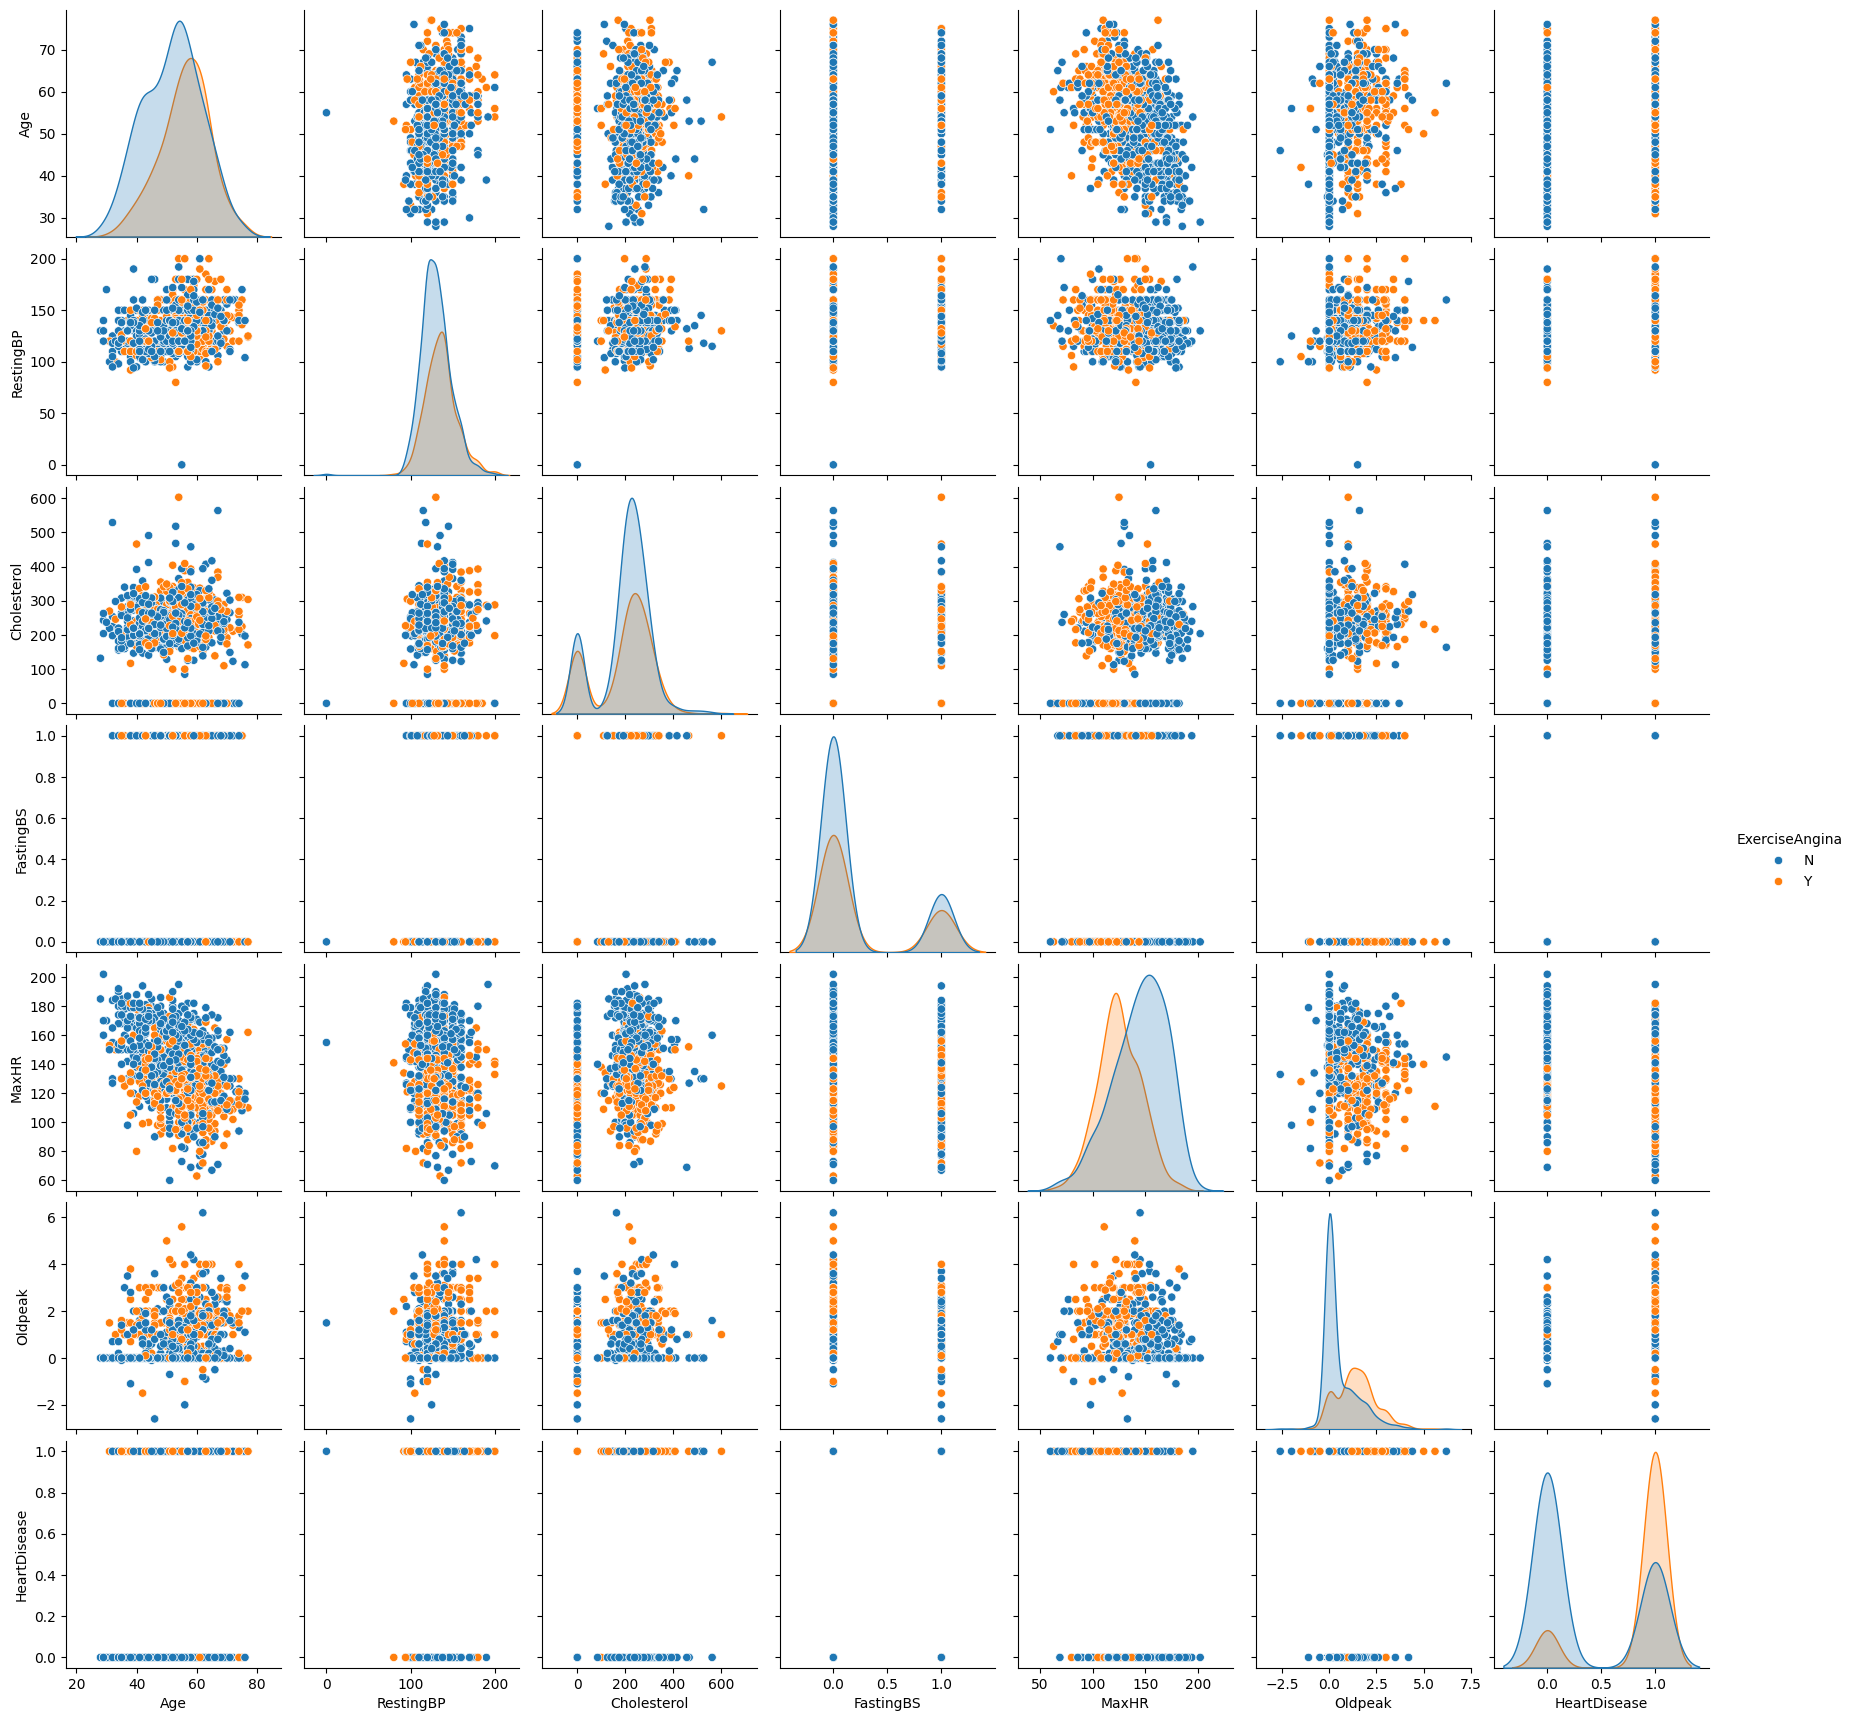

In [18]:
sns.pairplot(bp_df, hue='ExerciseAngina')

In contrast to the graph above, there isn't much differentiation between individuals who have experienced angina and those who haven't in terms of age, resting heart rate, cholesterol levels, fasting blood sugar, maximum heart rate, and ST depression induced by exercise. However, it's evident that both groups, those with and without heart disease, have individuals who have experienced angina.

Nevertheless, among individuals with heart disease, there is a significantly higher proportion who have experienced angina compared to those without angina. Conversely, among individuals without heart disease, there is a larger population who have not experienced angina compared to those who have.

In [15]:
# Read Chapter 1 in


#     "Practical Statistics for Data Scientist" by Bruce et al.    It is in the shared playlist for this course

# https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch01.html#idm45782049202520

#     Create several useful or informative boxplots of continuous variables by category.   Find an interesting result or contrast
# among the variables,   discuss what you think it means or implies

# Create violin plots of these same results

In [16]:
# Read Chapter 2 in

# "Practical Statistics for Data Scientist" by Bruce et al.    It is in the shared playlist for this course

# https://learning.oreilly.com/library/view/practical-statistics-for/9781492072935/ch01.html#idm45782049202520

# Use the bootstrap estimate discussed in this chapter to find
# the uncertainty in the mean and  median values of the Max heartrate variable in this data set.

